In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.proportion as prop

df = pd.read_csv("anggur.csv")

# NO. 1
Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Boleh juga ditambahkan deskripsi lain.

In [2]:
desc_stat = df.describe(include=[np.number])
desc_stat.loc['range'] = desc_stat.loc['max'] - desc_stat.loc['min']
desc_stat.loc['IQR'] = desc_stat.loc['75%'] - desc_stat.loc['25%']
desc_stat.loc['skewness'] = df.skew()
desc_stat.loc['kurtosis'] = df.kurtosis()

# Menampilkan deskripsi statistika
print(desc_stat)

          fixed acidity  volatile acidity  citric acid  residual sugar  \
count       1000.000000       1000.000000  1000.000000     1000.000000   
mean           7.152530          0.520839     0.270517        2.567104   
std            1.201598          0.095848     0.049098        0.987915   
min            3.320000          0.139900     0.116700        0.032555   
25%            6.377500          0.456100     0.237800        1.896330   
50%            7.150000          0.524850     0.272200        2.519430   
75%            8.000000          0.585375     0.302325        3.220873   
max           11.490000          0.805100     0.409600        5.550755   
range          8.170000          0.665200     0.292900        5.518200   
IQR            1.622500          0.129275     0.064525        1.324544   
skewness      -0.028879         -0.197699    -0.045576        0.132638   
kurtosis      -0.019292          0.161853    -0.104679       -0.042980   

            chlorides  free sulfur di

# NO. 2
Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut.

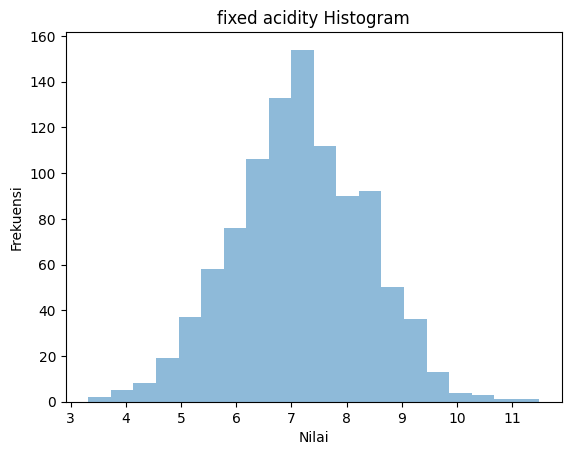

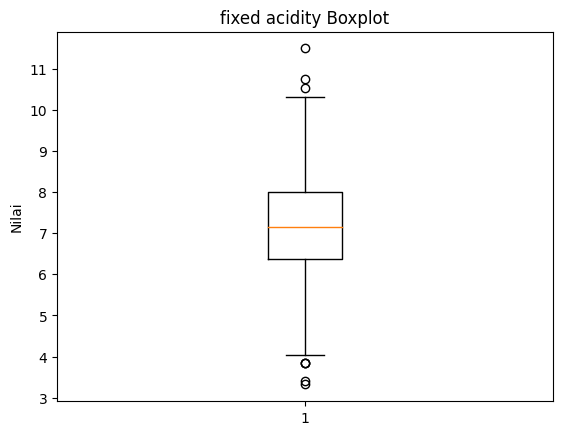

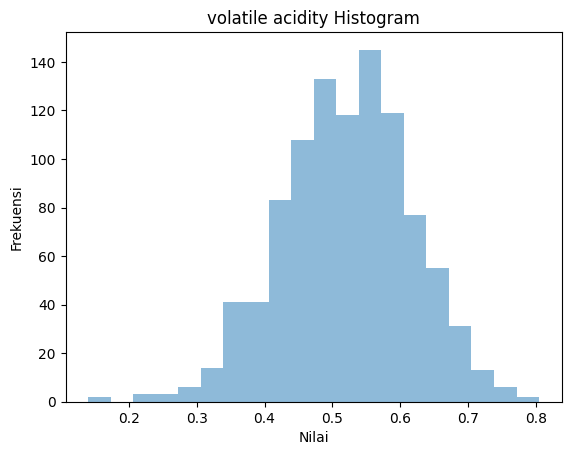

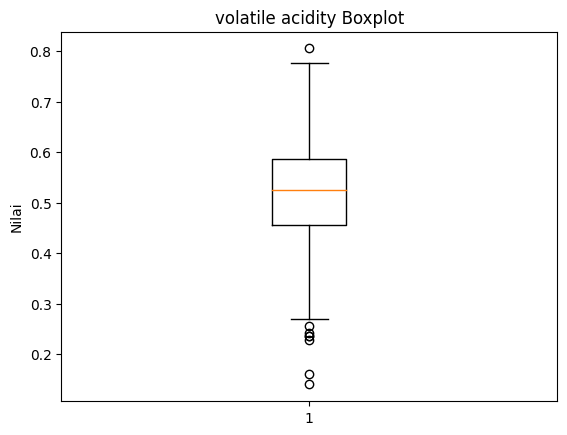

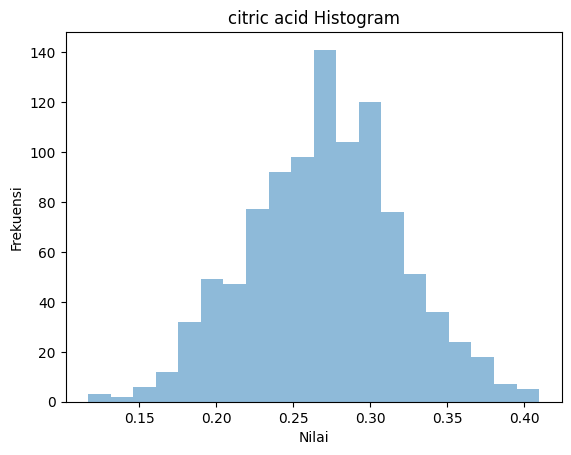

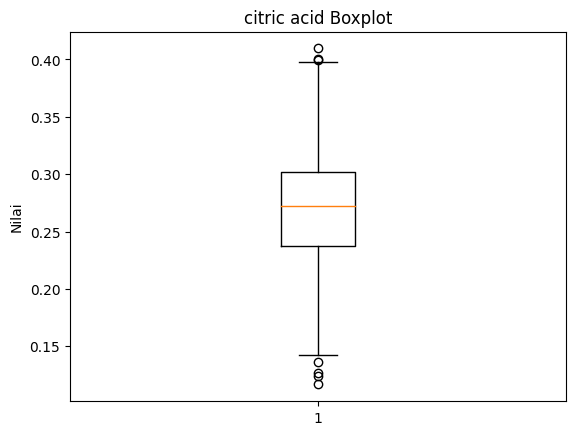

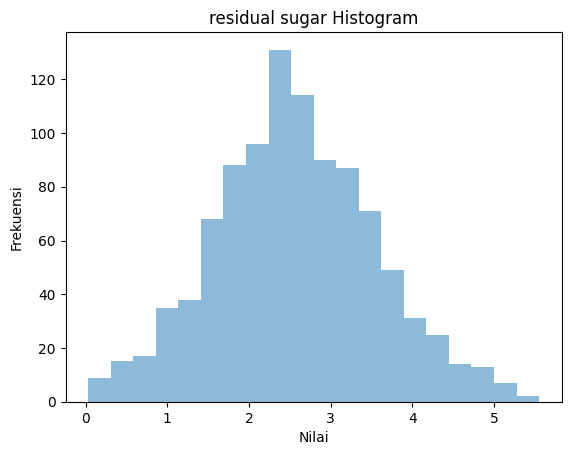

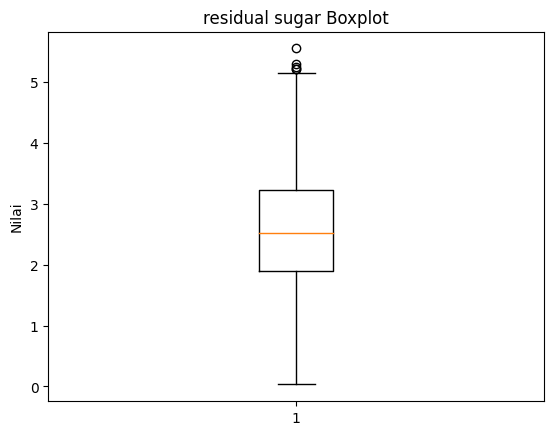

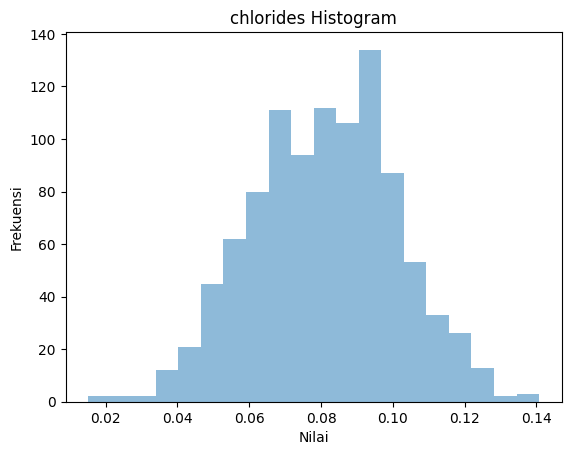

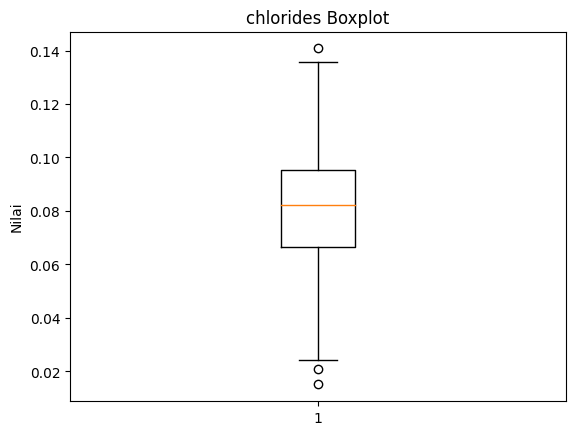

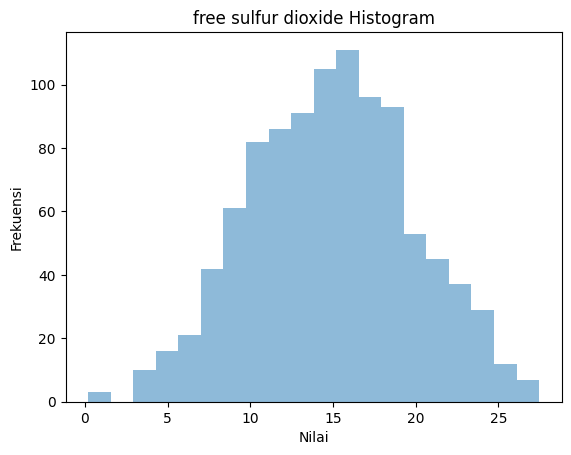

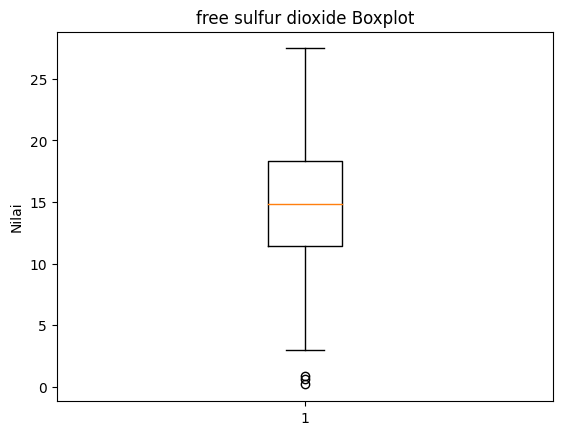

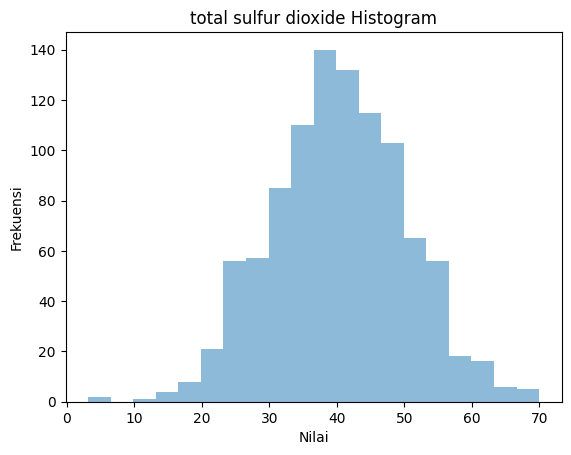

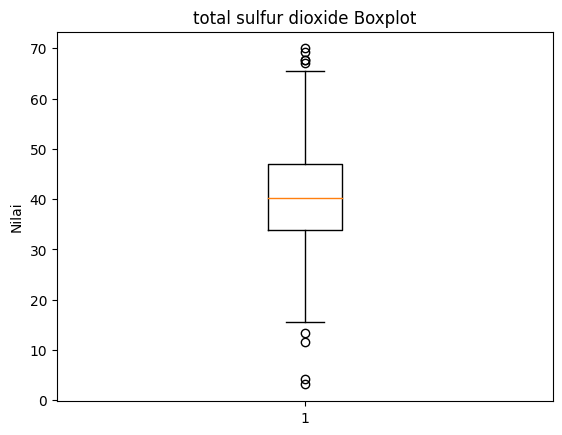

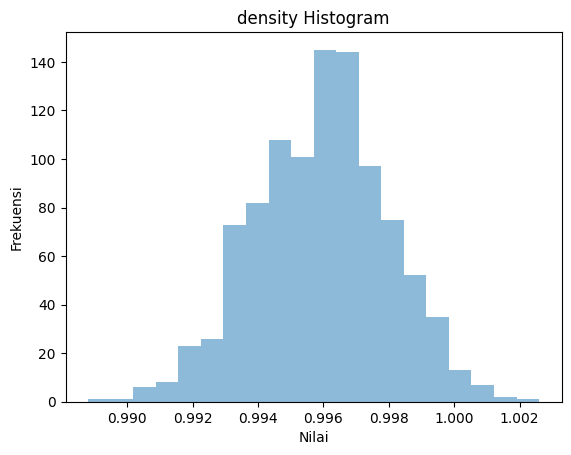

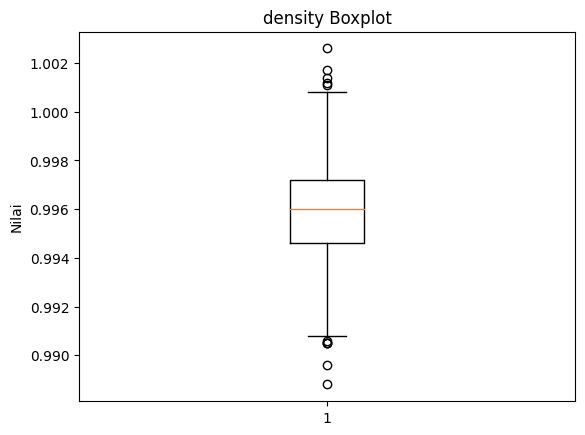

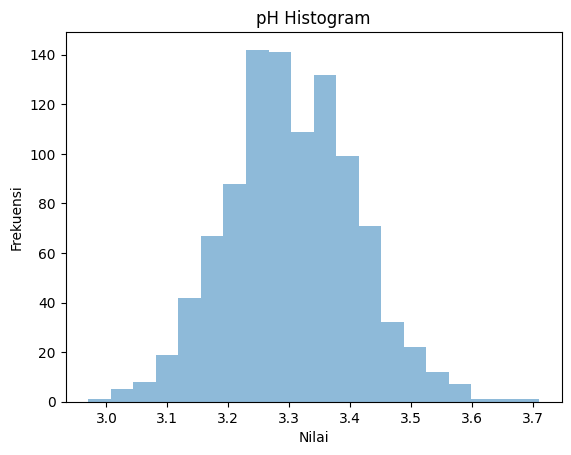

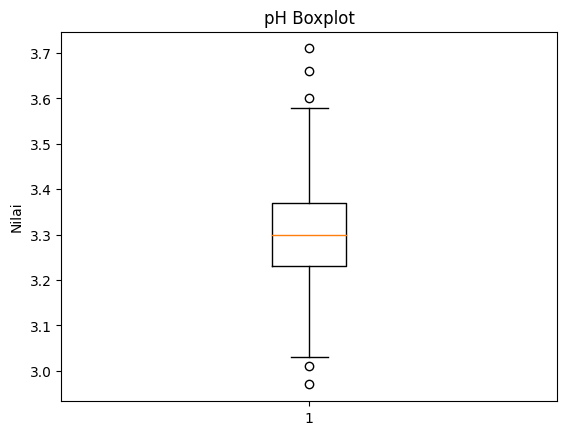

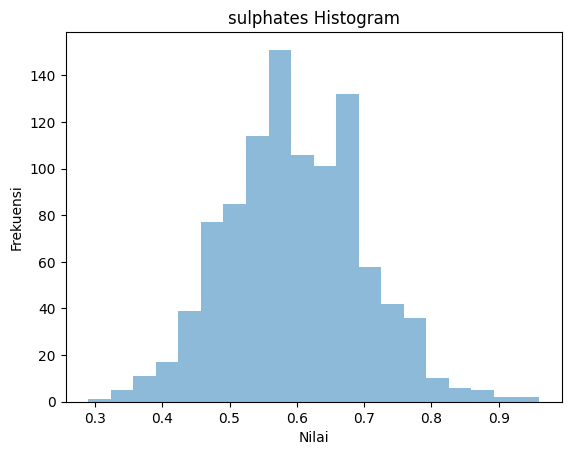

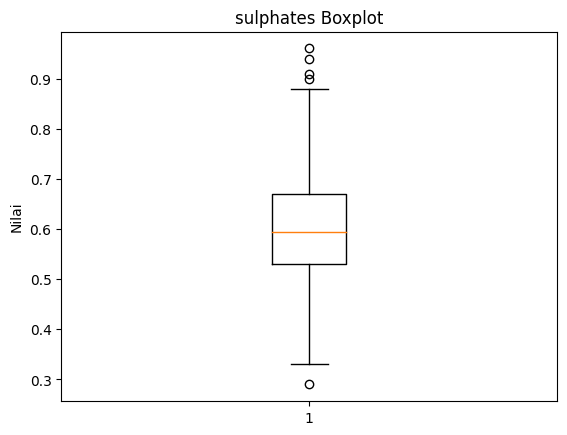

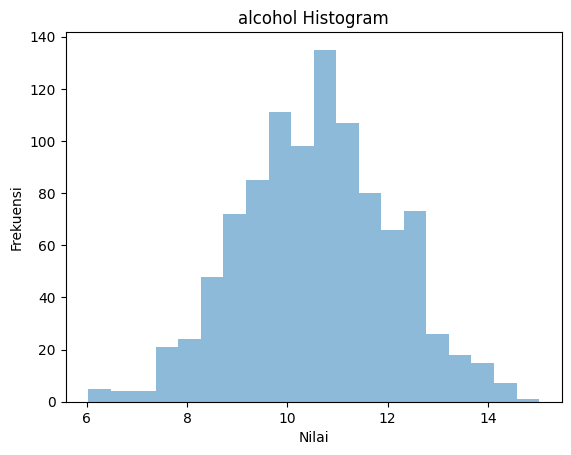

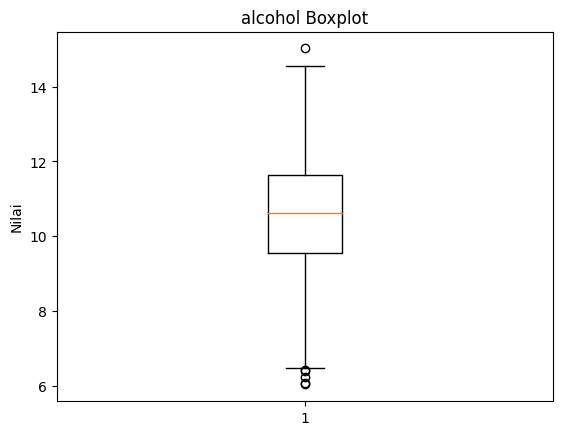

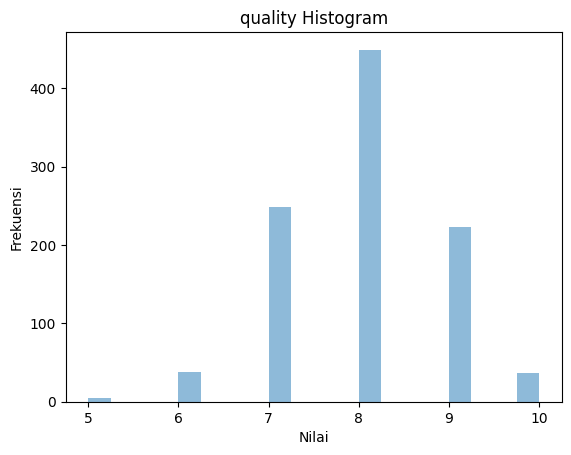

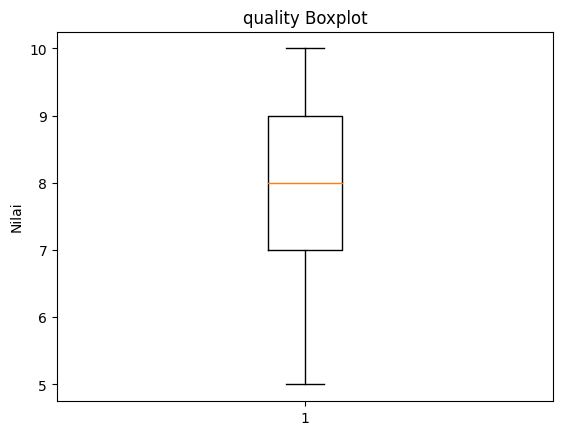

In [3]:
for col in df.select_dtypes(include=[np.number]).columns:
    # Histogram
    fig, ax = plt.subplots()
    ax.hist(df[col], bins=20, alpha=0.5)
    ax.set_title(col + ' Histogram')
    ax.set_xlabel('Nilai')
    ax.set_ylabel('Frekuensi')
    plt.show()
    
    # Boxplot
    fig, ax = plt.subplots()
    ax.boxplot(df[col])
    ax.set_title(col + ' Boxplot')
    ax.set_ylabel('Nilai')
    plt.show()

# NO. 3
Menentukan setiap kolom numerik berdistribusi normal atau tidak. Gunakan normality test yang dikaitkan dengan histogram plot.

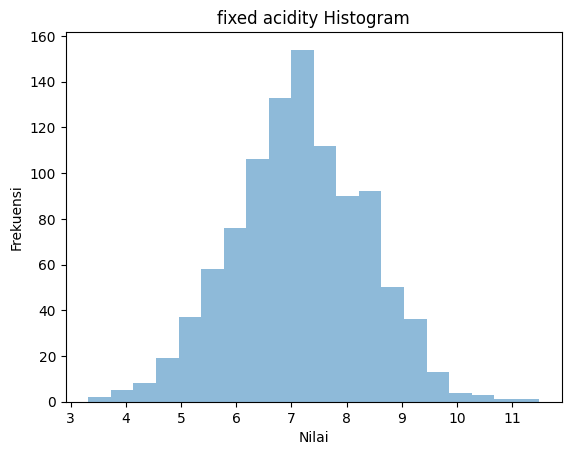

fixed acidity berdistribusi normal


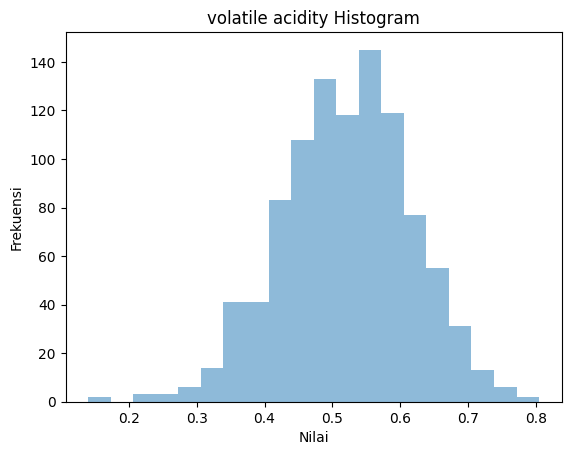

volatile acidity tidak berdistribusi normal


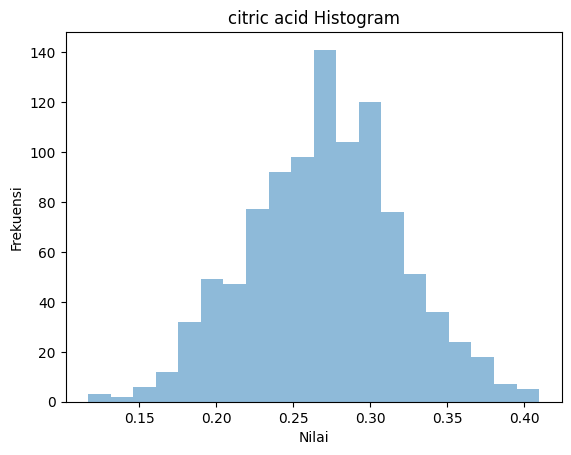

citric acid berdistribusi normal


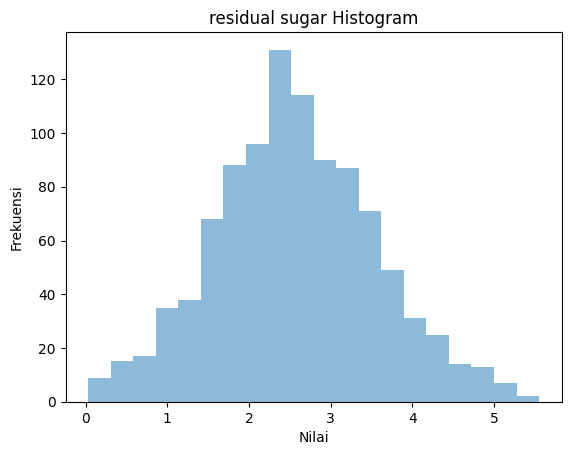

residual sugar berdistribusi normal


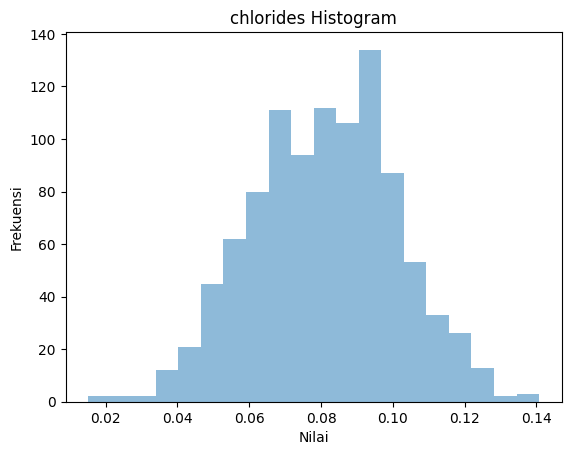

chlorides berdistribusi normal


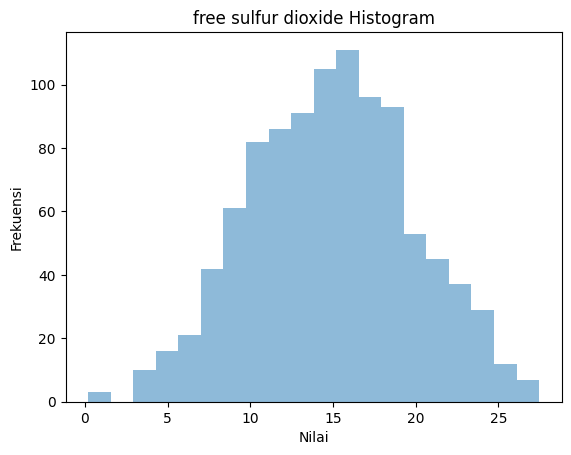

free sulfur dioxide tidak berdistribusi normal


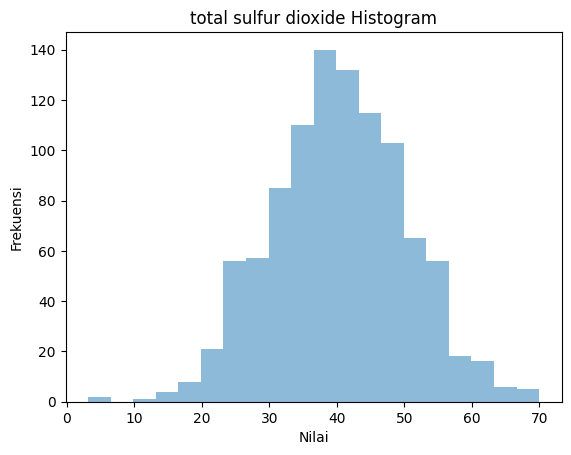

total sulfur dioxide berdistribusi normal


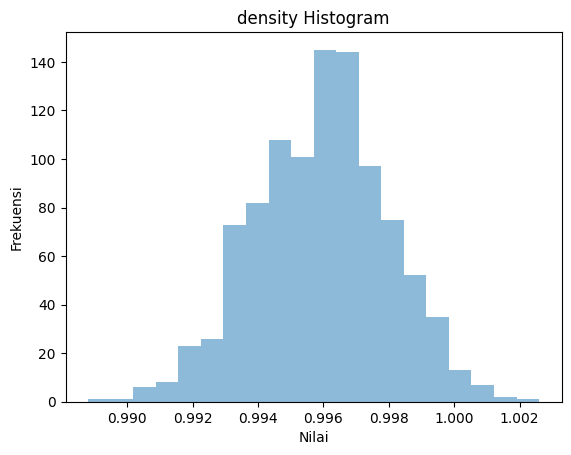

density berdistribusi normal


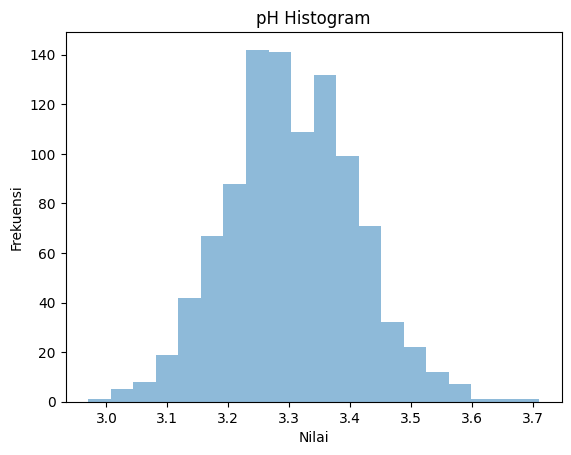

pH berdistribusi normal


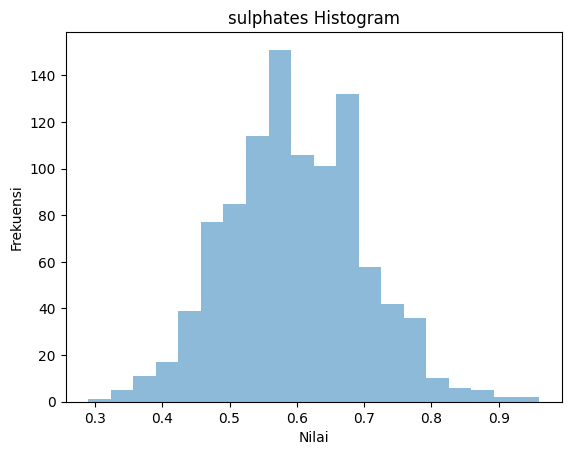

sulphates berdistribusi normal


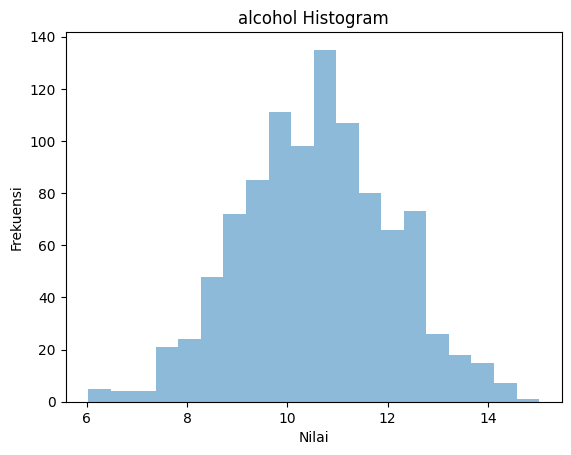

alcohol berdistribusi normal


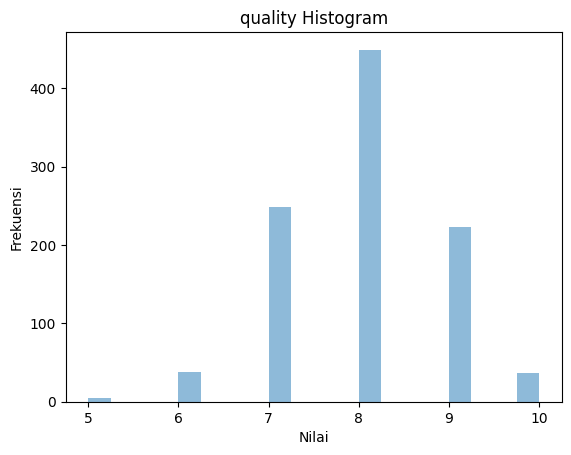

quality berdistribusi normal


In [4]:
for col in df.select_dtypes(include=[np.number]).columns:
    # Histogram
    fig, ax = plt.subplots()
    ax.hist(df[col], bins=20, alpha=0.5)
    ax.set_title(col + ' Histogram')
    ax.set_xlabel('Nilai')
    ax.set_ylabel('Frekuensi')
    plt.show()
    
    # Normality Test
    p_value = stats.normaltest(df[col])[1]
    if p_value < 0.05:
        print(col + ' tidak berdistribusi normal')
    else:
        print(col + ' berdistribusi normal')

# NO. 4
Melakukan test hipotesis 1 sampel

In [5]:
# Nilai rata-rata pH di atas 3.29?
# One-sample t-test
alpha = 0.05
pH_mean = df['pH'].mean()
pH_pop_mean = 3.29
pH_std = df['pH'].std()
n = df['pH'].shape[0]

t_stat, p_value = stats.ttest_1samp(df['pH'], pH_pop_mean)

# Interpretation
if p_value < alpha:
    print('Hypothesis Rejected')
else:
    print('Hypothesis Not Rejected')
    
print('pH Mean:', pH_mean)
print('pH Population Mean:', pH_pop_mean)
print('t-Statistic:', t_stat)
print('p-Value:', p_value)

Hypothesis Rejected
pH Mean: 3.30361
pH Population Mean: 3.29
t-Statistic: 4.1037807933651145
p-Value: 4.395916612772017e-05


In [6]:
# Nilai rata-rata Residual Sugar tidak sama dengan 2.50?
# One-sample t-test
alpha = 0.05
res_sugar_mean = df['residual sugar'].mean()
res_sugar_pop_mean = 2.50
res_sugar_std = df['residual sugar'].std()
n = df['residual sugar'].shape[0]

t_stat, p_value = stats.ttest_1samp(df['residual sugar'], res_sugar_pop_mean)

# Interpretation
if p_value < alpha:
    print('Hypothesis Rejected')
else:
    print('Hypothesis Not Rejected')
    
print('Residual Sugar Mean:', res_sugar_mean)
print('Residual Sugar Population Mean:', res_sugar_pop_mean)
print('t-Statistic:', t_stat)
print('p-Value:', p_value)

Hypothesis Rejected
Residual Sugar Mean: 2.5671036825067595
Residual Sugar Population Mean: 2.5
t-Statistic: 2.1479619435539523
p-Value: 0.03195672670861676


In [7]:
# Nilai rata-rata 150 baris pertama kolom sulphates bukan 0.65?
# One-sample t-test
alpha = 0.05
sulphates_mean = df.iloc[:150]['sulphates'].mean()
sulphates_pop_mean = 0.65
sulphates_std = df.iloc[:150]['sulphates'].std()
n = df.iloc[:150]['sulphates'].shape[0]

t_stat, p_value = stats.ttest_1samp(df.iloc[:150]['sulphates'], sulphates_pop_mean)

# Interpretation
if p_value < alpha:
    print('Hypothesis Rejected')
else:
    print('Hypothesis Not Rejected')
    
print('Sulphates Mean:', sulphates_mean)
print('Sulphates Population Mean:', sulphates_pop_mean)
print('t-Statistic:', t_stat)
print('p-Value:', p_value)

Hypothesis Rejected
Sulphates Mean: 0.6058666666666667
Sulphates Population Mean: 0.65
t-Statistic: -4.964843393315917
p-Value: 1.8590151212371927e-06


In [8]:
# Nilai rata-rata total sulfur dioxide di bawah 35?
# One-sample t-test
alpha = 0.05
tot_sulfur_diox_mean = df['total sulfur dioxide'].mean()
tot_sulfur_diox_pop_mean = 35
tot_sulfur_diox_std = df['total sulfur dioxide'].std()
n = df['total sulfur dioxide'].shape[0]

t_stat, p_value = stats.ttest_1samp(df['total sulfur dioxide'], tot_sulfur_diox_pop_mean)

# Interpretation
if p_value < alpha:
    print('Hypothesis Rejected')
else:
    print('Hypothesis Not Rejected')
    
print('Total Sulfur Dioxide Mean:', tot_sulfur_diox_mean)
print('Total Sulfur Dioxide Population Mean:', tot_sulfur_diox_pop_mean)
print('t-Statistic:', t_stat)
print('p-Value:', p_value)

Hypothesis Rejected
Total Sulfur Dioxide Mean: 40.290150000000004
Total Sulfur Dioxide Population Mean: 35
t-Statistic: 16.786387372296744
p-Value: 6.733795653979516e-56


In [9]:
# Proporsi nilai total Sulfat Dioxide yang lebih dari 40, adalah tidak sama dengan 50% ?
# One-sample proportion test
alpha = 0.05
tot_sulf_diox_prop = sum(df['total sulfur dioxide'] > 40)/df['total sulfur dioxide'].shape[0]
tot_sulf_diox_pop_prop = 0.5

z_stat, p_value = prop.proportions_ztest(count=sum(df['total sulfur dioxide'] > 40), nobs=df['total sulfur dioxide'].shape[0], value=tot_sulf_diox_pop_prop)

# Interpretation
if p_value < alpha:
    print('Hypothesis Rejected')
else:
    print('Hypothesis Not Rejected')
    
print('Total Sulfur Dioxide Proportion:', tot_sulf_diox_prop)
print('Total Sulfur Dioxide Population Proportion:', tot_sulf_diox_pop_prop)
print('z-Statistic:', z_stat)
print('p-Value:', p_value)

Hypothesis Not Rejected
Total Sulfur Dioxide Proportion: 0.512
Total Sulfur Dioxide Population Proportion: 0.5
z-Statistic: 0.7591653095427344
p-Value: 0.4477536749931885


# NO. 5
Melakukan test hipotesis 2 sampel

In [10]:
# Data kolom fixed acidity dibagi 2 sama rata: bagian awal dan bagian akhir kolom.
# Benarkah rata-rata kedua bagian tersebut sama?
# Split the column into two equal parts
n = len(df['fixed acidity'])
df1 = df.loc[:n//2-1, 'fixed acidity']
df2 = df.loc[n//2:, 'fixed acidity']

# Perform t-test
t, p = stats.ttest_ind(df1, df2)

# Check if the mean of the two parts are equal
if p > 0.05:
    print('Mean of the two parts are equal')
else:
    print('Mean of the two parts are not equal')

Mean of the two parts are equal


In [11]:
# Data kolom chlorides dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah
# rata-rata bagian awal lebih besar daripada bagian akhir sebesar 0.001?
# Split the column into two equal parts
n = len(df['chlorides'])
df1 = df.loc[:n//2-1, 'chlorides']
df2 = df.loc[n//2:, 'chlorides']

# Perform t-test
t, p = stats.ttest_ind(df1, df2)

# Check if the mean of the first part is greater than the mean of the second part by 0.001
if p/2 < 0.001 and t > 0:
    print('Mean of the first part is greater than the mean of the second part by 0.001')
else:
    print('Mean of the first part is not greater than the mean of the second part by 0.001')

Mean of the first part is not greater than the mean of the second part by 0.001


In [12]:
#Benarkah rata-rata sampel 25 baris pertama kolom Volatile Acidity sama dengan
# rata-rata 25 baris pertama kolom Sulphates ?
# Take the first 25 rows of each column
df1 = df.loc[:24, 'volatile acidity']
df2 = df.loc[:24, 'sulphates']

# Perform t-test
t, p = stats.ttest_ind(df1, df2)

# Check if the mean of the two parts are equal
if p > 0.05:
    print('Mean of the two parts are equal')
else:
    print('Mean of the two parts are not equal')

Mean of the two parts are not equal


In [13]:
# Bagian awal kolom residual sugar memiliki variansi yang sama dengan bagian akhirnya?
# Split the column into two equal parts
n = len(df['residual sugar'])
df1 = df.loc[:n//2-1, 'residual sugar']
df2 = df.loc[n//2:, 'residual sugar']

# Perform Levene's test for equal variances
w, p = stats.levene(df1, df2)

# Check if the variances of the two parts are equal
if p > 0.05:
    print('Variance of the two parts are equal')
else:
    print('Variance of the two parts are not equal')

Variance of the two parts are equal


In [14]:
# Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah lebih besar
# daripada, proporsi nilai yang sama di setengah bagian akhir alcohol?
# Split the column into two equal parts
n = len(df['alcohol'])
df1 = df.loc[:n//2-1, 'alcohol']
df2 = df.loc[n//2:, 'alcohol']

# Calculate the proportion of values greater than 7 in each part
prop1 = (df1 > 7).sum() / len(df1)
prop2 = (df2 > 7).sum() / len(df2)

# Perform t-test
t, p = stats.ttest_ind(df1 > 7, df2 > 7)

# Check if the proportion of values greater than 7 in the first part is greater than the second part
if p/2 < 0.05 and t > 0:
    print('Proportion of values greater than 7 in the first part is greater than the second part')
else:
    print('Proportion of values greater than 7 in the first part is not greater than the second part')

Proportion of values greater than 7 in the first part is not greater than the second part
